<font color='maroon' size='6'>**Unsupervised Learning: Clustering & Model Evaluation**</font> 
----
-----


### *Agenda*
 
1. Unsupervised Learning - Clustering
    - K-Means Clustering
    - Gaussian Mixture Models
        - Expectation Maximization
    - Hierarchical Clustering - Agglomerative 
2. Clustering Performance Evaluation
    - Rand index
    - Mutual Information based scores
    - Homogeneity, completeness and V-measure
    - Fowlkes-Mallows scores
    - Silhouette Coefficient
    - Calinski-Harabasz Index
    - Davies-Bouldin Index
    - Contingency Matrix
3. Feature Selection vs Feature Extraction
   - Principal component analysis (PCA)

-----


<font color='maroon' size='5'>**Clustering**</font> 
----


The main feature of unsupervised learning algorithms, when compared to classification and regression methods, is that input data are unlabeled (i.e. no labels or classes given) and that the algorithm learns the **structure/pattern** of the data without any assistance. This creates two main differences: 
- First, it allows us to process large amounts of data because the data does not need to be manually labeled. 
- Second, it is difficult to evaluate the quality of an unsupervised algorithm due to the absence of an explicit goodness metric as used in supervised learning.  

One of the most common tasks in unsupervised learning is dimensionality reduction. On one hand, dimensionality reduction may help with data visualization while, on the other hand, it may help deal with the multicollinearity of your data and prepare the data for a supervised learning method (e.g. decision trees).

-----

<font color='maroon' size='4'>**Clustering API in scikit-learn**</font> 
----
-----

- Clustering of unlabeled data can be performed with the module `sklearn.cluster`.

- Given a `scikit-learn` estimator object named **model**, the following methods are available for each clustering algorithm:

    - accepts only a single argument, the data **`X`** (e.g. **`model.fit(X)`**) method to learn the clusters on train data.
    - transform or infer properties of the data using the **``transform()``** or **``predict()``**
        - **`model.transform()`:** given an unsupervised model, transform new data into the new basis. This also accepts one argument **X_new**, and returns the new representation of the data based on the unsupervised model.

        - **`model.fit_transform()`:** some estimators implement this method, which more efficiently performs a fit and a transform on the same input data.

----


#### Input data

One important thing to note is that the algorithms implemented in this module can take different kinds of matrix as input. All the methods accept standard data matrices of shape (`n_samples, n_features`). 


----
<font color='maroon' size='5'>**K-means Clustering**</font> 
----

-----

The **KMeans** algorithm clusters data by trying to separate samples in **n** groups of **equal variance**, minimizing a criterion known as the **inertia** or **within-cluster** sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of $N$ samples $X$ into $K$ disjoint clusters $C$, each described by the mean $\mu_j$
 of the samples in the cluster. The means are commonly called the cluster ***“centroids”***.

The K-means algorithm aims to choose **centroids** that minimise the **inertia**, or **within-cluster sum-of-squares** criterion:


----------------------

The *K*-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

- The first step chooses the initial centroids, with the most basic method being to choose samples from the dataset. After initialization, K-means consists of looping between the two other steps. 
    
    - The first step assigns each sample to its nearest centroid. 

    - The second step creates new centroids by taking the mean value of all of the samples assigned to each previous centroid. The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold. In other words, it repeats until the centroids do not move significantly.
    

Those two assumptions are the basis of the *K*-means model.
We will soon dive into exactly *how* the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the *k*-means result.

----
<img src="KmeansAnimation.gif" alt="Alternate text" />

-----


K-means aim to decipher coherent clusters by optimizing the objective function, also known as the <b>distortion function</b>:

\begin{equation*}
\mathcal{J}(c, \boldsymbol{\mu}) = \sum_{i=1}^N || \mathbf{x}^{(i)} - \boldsymbol{\mu}_{c^{(i)}} ||^2_2,
\end{equation*}

where $\mathcal{J}$ is the distortion function, $c^{(i)}$ is the assigned cluster label for sample $\mathbf{x}^{(i)}$, and $\boldsymbol{\mu}_{c^{(i)}}$ is the cluster centroid to which this sample has been assigned. The distortion objective is thus defined as the sum of squared distances between each sample and its dominating centroid.


K-means optimizes this objective using <b>alternating minimization</b> via two steps:

1) <b>Cluster assignment</b> – for every $i$

\begin{equation*}
c^{(i)}= \mathop{\rm argmin}_k ||\mathbf{x}^{(i)} - \boldsymbol{\mu}_k||^2_2.
\end{equation*}

2) <b>Mean update</b> – for every $k$

\begin{equation*}
\boldsymbol{\mu}_k= \frac{1}{N_k} \sum_{i:c^{(i)}=k} \mathbf{x}^{(i)},
\end{equation*}

where $N_k = |\{c^{(i)} = k\}|$ are the number of samples assigned to cluster $k$.

These two steps are "alternating minimization" in the sense that the K-means algorithm is repeatedly minimizing $\mathcal{J}$ with respect to $c$ while holding $\boldsymbol{\mu}$ constant, and then repeatedly minimizing $\mathcal{J}$ with respect to $\boldsymbol{\mu}$ while holding $c$ fixed. Using this approach, K-means will find a local minimum of $\mathcal{J}(c, \boldsymbol{\mu})$.



Note that K-means is an iterative algorithm, such that each of these steps has an associated iteration/time index $t$, hence the "repeatedly" aspect.



- Inertia can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:

    - Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.

    - Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.

----
***Note:*** K-means is equivalent to the **expectation-maximization (EM)** algorithm with a **small, all-equal, diagonal covariance matrix**.



-----
<font color=maroon size='4'>**K-means with scikit-learn**</font> 
----
----

In [1]:
import numpy as np
from scipy import stats

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style("whitegrid")

sns.set_palette("rocket")
# ignore warnings
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
warnings.filterwarnings('ignore')

# import some data to play with
from sklearn import datasets

In [2]:
from IPython.display import IFrame


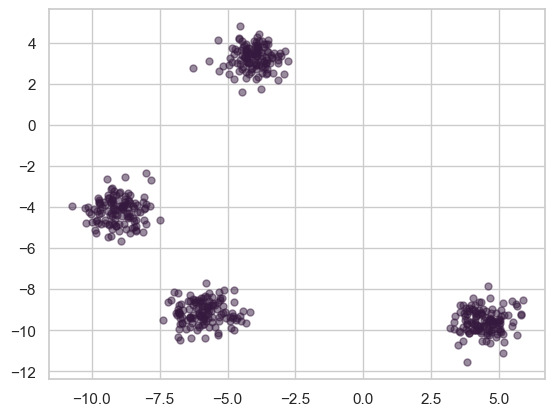

In [3]:
from sklearn.datasets import make_blobs
X, yTrue = make_blobs(n_samples=500, centers=4,
                       cluster_std=0.60, random_state=21)
plt.scatter(X[:, 0], X[:, 1], s=25, alpha=0.5);

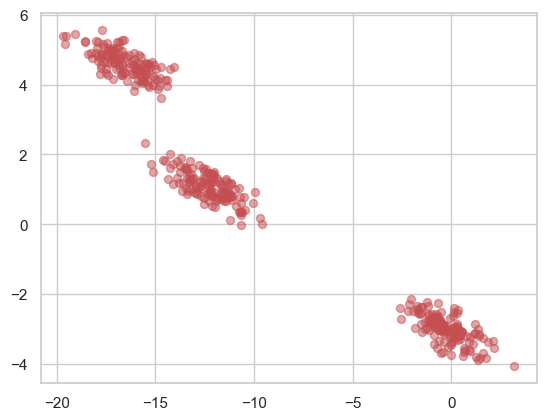

In [4]:
X, yTrue = make_blobs(n_samples=400, centers=3,
                       cluster_std=0.66, random_state=9)
rng = np.random.RandomState(7)
XStretched = np.dot(X, rng.randn(2, 2))
fig = plt.figure()
plt.scatter(XStretched[:, 0], XStretched[:, 1], s=33, c='r',alpha=0.5);
fig.savefig('cluster.png')

In [5]:
from sklearn.cluster import KMeans
kMeans = KMeans(n_clusters=4)
kMeans.fit(X)
yKMeans = kMeans.predict(X)

  File "C:\Users\guludag\Anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


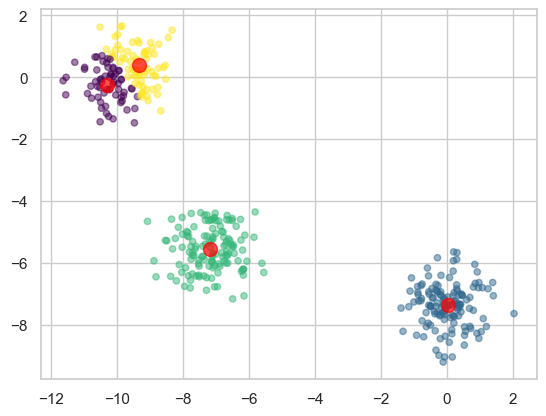

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=yKMeans, s=21, cmap='viridis', alpha=0.5)
centers = kMeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.7);

K-means model places a circle (or, in higher dimensions, a hyper-sphere) at the center of each cluster, with a radius defined by the most distant point in the cluster.
This radius acts as a **hard cutoff** for cluster assignment within the training set: any point outside this circle is not considered a member of the cluster.
We can visualize this cluster model with the following method:

In [7]:
from scipy.spatial.distance import cdist

def plotKMeans(kmeans, X, n_clusters=4, ax=None, random_state=21):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=21, cmap='viridis', zorder=2, alpha=0.4)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.7);
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#cea7b4', lw=3, alpha=0.5, zorder=1))
    

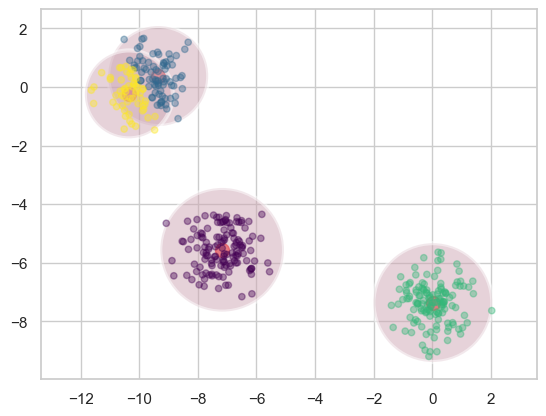

In [8]:
kMeans = KMeans(n_clusters=4, random_state=21)
plotKMeans(kMeans, X)

An important observation for *K*-means is that these cluster models *must be circular*: *K*-means has no built-in way of accounting for oblong or elliptical clusters.
So, for example, if we take the same data and transform it, the cluster assignments end up becoming muddled:

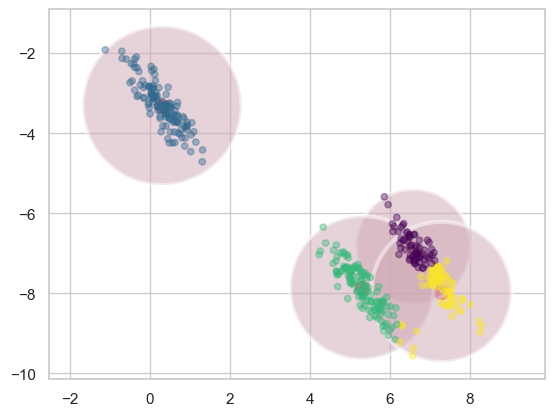

In [9]:
rng = np.random.RandomState(13)
XStretched = np.dot(X, rng.randn(2, 2))

kMeans = KMeans(n_clusters=4, random_state=21)
plotKMeans(kMeans, XStretched)

As we recognize that these transformed clusters are non-circular, and thus circular clusters would be a poor fit.
Nevertheless, *K*-means is not flexible enough to account for this, and tries to force-fit the data into four circular clusters.
This results in a mixing of cluster assignments where the resulting circles overlap.

These  disadvantages of *K*-means—its **lack of flexibility** in cluster **shape** and **lack of probabilistic cluster assignment—mean** that for many datasets (***especially low-dimensional datasets***) it may not perform as well as you might hope.

You might imagine addressing these weaknesses by generalizing the *K*-means model: for example, you could measure uncertainty in cluster assignment by comparing the distances of each point to *all* cluster centers, rather than focusing on just the closest.
You might also imagine allowing the cluster boundaries to be ellipses rather than circles, so as to account for non-circular clusters.
It turns out these are two essential components of a different type of clustering model, **Gaussian Mixture Models.**

#### Penguins Dataset

In [10]:
penguinsDf = sns.load_dataset("penguins")
penguins = penguinsDf.dropna()
penDf = penguins.copy()
penDf.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

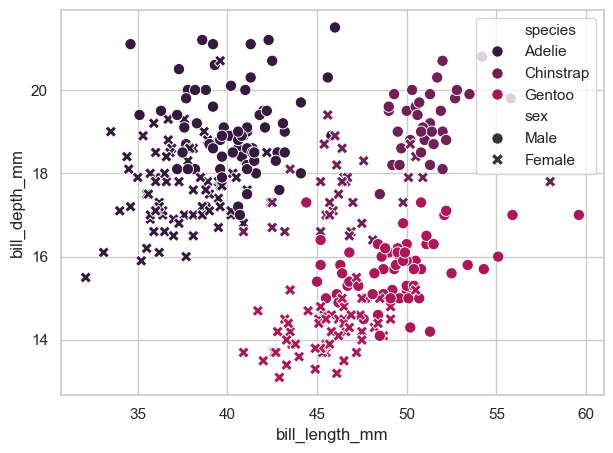

In [11]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=penguins, x='bill_length_mm', 
                y='bill_depth_mm', hue="species", style="sex", s=66)

In [12]:
yPen=penguins.species
XPen=penguins.drop('species', axis=1)
XPen.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male


In [13]:
XPen2D = penguins.loc[:,['bill_length_mm', 'bill_depth_mm']] 

In [14]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [15]:
k4Means = KMeans(n_clusters=4)
k4Means.fit(XPen2D)

KMeans(n_clusters=4)

In [16]:
k4Means.cluster_centers_


array([[41.04125   , 18.52625   ],
       [51.09102564, 17.51538462],
       [36.66849315, 17.92739726],
       [46.12156863, 15.28333333]])

In [17]:
y4Pred = k4Means.labels_

In [18]:
# Using the predict method of KMeans to predict 3 clusters using the sample data
y4Pred = k4Means.predict(XPen2D)

In [19]:
metrics.rand_score(yPen, y4Pred)

0.7497015087376533

In [20]:
k3Means = KMeans(n_clusters=3)

k3Means.fit(XPen2D)

# check how many of the samples were correctly labeled
y3Pred = k3Means.labels_
metrics.rand_score(yPen, y3Pred)

0.8008972828249936

In [21]:
k3Means.cluster_centers_

array([[50.90352941, 17.33647059],
       [38.42426471, 18.27794118],
       [45.50982143, 15.68303571]])

In [22]:
xs, ys = np.transpose(k3Means.cluster_centers_)

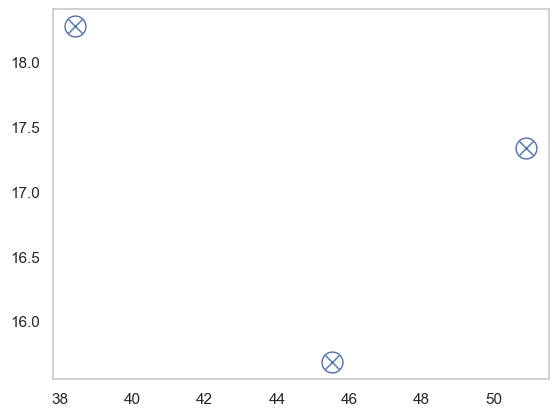

In [23]:
options = dict(color='b', ls='none', mfc='none')
plt.plot(xs, ys, marker='o', ms=15, **options)
plt.plot(xs, ys, marker='x', ms=10, **options);
plt.grid()
plt.show()

In [24]:
def plotCenters(centers, color='g'):
    xs, ys = np.transpose(centers)
    options = dict(color=color, ls='none', mfc='none')
    plt.plot(xs, ys, marker='o', ms=15, **options)
    plt.plot(xs, ys, marker='x', ms=10, **options)

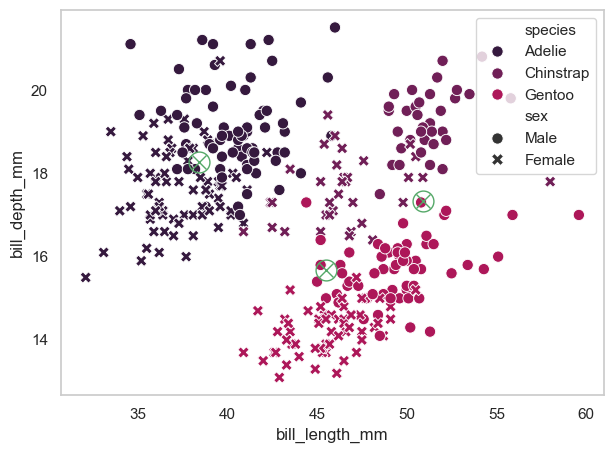

In [25]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=penguins, x='bill_length_mm', 
                y='bill_depth_mm', hue="species", style="sex", s=66)
plotCenters(k3Means.cluster_centers_)
plt.grid()
plt.show()

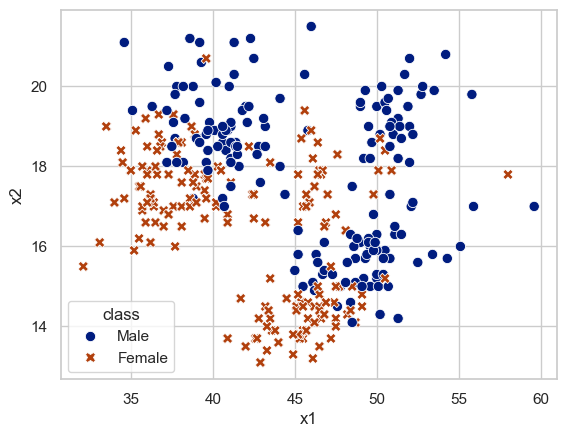

In [26]:

sns.color_palette("dark", as_cmap=True)
sns.set(style="whitegrid", palette="dark", color_codes=True) 
penguins['x1']=penguins['bill_length_mm']
penguins['x2']=penguins['bill_depth_mm']
penguins['class']=penguins['sex']

fig = plt.figure()
sns.scatterplot(data=penguins, x='x1', 
                y='x2', hue="class", style='class', s=55)
fig.savefig('lda.png')

In [27]:
penguins['species'] = k3Means.labels_

##### K-means clustering with `random` centroids

In [28]:
k3MeansRnd = KMeans(n_clusters=3, init='random', random_state = 21)
k3MeansRnd.fit(XPen2D)

KMeans(init='random', n_clusters=3, random_state=21)

In [29]:
yPredRnd = k3MeansRnd.fit_predict(XPen2D)

In [30]:
metrics.rand_score(yPen, yPredRnd)

0.8008972828249936

In [31]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,x1,x2,class
0,1,Torgersen,39.1,18.7,181.0,3750.0,Male,39.1,18.7,Male
1,1,Torgersen,39.5,17.4,186.0,3800.0,Female,39.5,17.4,Female
2,1,Torgersen,40.3,18.0,195.0,3250.0,Female,40.3,18.0,Female
4,1,Torgersen,36.7,19.3,193.0,3450.0,Female,36.7,19.3,Female
5,1,Torgersen,39.3,20.6,190.0,3650.0,Male,39.3,20.6,Male


In [32]:
# We plot a cross tab matrix to check how well has our K-Means model classified the Species
matrix = pd.DataFrame({'labels': yPredRnd, 'species': yPen})
ct = pd.crosstab(matrix['labels'], matrix['species'])
print(ct)

species  Adelie  Chinstrap  Gentoo
labels                            
0            11         27      74
1           135          1       0
2             0         40      45


----
##### K-means clustering with scaled features


All such distance based algorithms are affected by the scale of the variables.

In [33]:
XPen.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male


In [34]:
pngDf= penguinsDf.dropna()
pngDf .head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [35]:
XPen4D=pngDf.drop(['species', 'island', 'sex'], axis=1)
XPen4D.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [36]:
# Use StandardScaler to apply Standardisation
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
XPenSs = ss.fit_transform(XPen4D)
XPen4DSs =  pd.DataFrame(XPenSs, columns=[XPen4D.columns])
XPen4DSs.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361
3,-1.335566,1.085877,-0.569284,-0.941606
4,-0.859415,1.747026,-0.783651,-0.692852


In [37]:
kMeans = KMeans(n_clusters=3)
kMeans.fit(XPen4DSs)
# check how many of the samples were correctly labeled
yPredKMeans = kMeans.labels_
metrics.rand_score(yPen, yPredKMeans)

0.9086616737219146

In [38]:
matrix = pd.DataFrame({'labels': yPredKMeans, 'species': yPen})
ct = pd.crosstab(matrix['labels'], matrix['species'])
print(ct)

species  Adelie  Chinstrap  Gentoo
labels                            
0             0          0     119
1            22         63       0
2           124          5       0




-----
<font color=maroon size='4'>**Choosing the number of clusters for K-means**</font> 
----
----


In contrast to the supervised learning tasks such as classification and regression, clustering requires more effort to choose the optimization criterion. Usually, when working with K-means, we optimize the **sum of squared distances** between the observations and their centroids.

$$ J(C) = \sum_{k=1}^K\sum_{i~\in~C_k} ||x_i - \mu_k|| \rightarrow \min\limits_C,$$

where $C$ – is a set of clusters with power $K$, $\mu_k$ is a centroid of a cluster $C_k$.

This definition seems reasonable -- we want our observations to be as close to their centroids as possible. But, there is a problem -- the optimum is reached when the number of centroids is equal to the number of observations, so you would end up with every single observation as its own separate cluster.

In order to avoid that case, we should choose a number of clusters after which a function $J(C_k)$ is decreasing less rapidly. More formally,
$$ D(k) = \frac{|J(C_k) - J(C_{k+1})|}{|J(C_{k-1}) - J(C_k)|}  \rightarrow \min\limits_k $$


----
<font color=maroon size='3'>**Elbow method**</font> 
----
----



- Using the elbow method to find the optimal number of clusters. Let's use 1 to 11 as range of clusters.
- We will use 'random' initialization method for this study.
- Note that Sklearn K-Means algorithm also have ‘k-means++’ initialization method. It selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.

-----

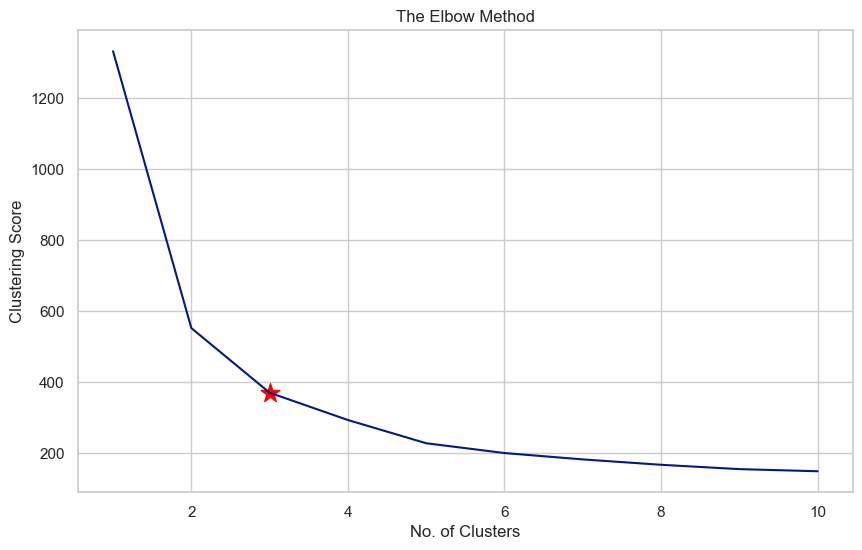

In [39]:
clusteringScore = []
for i in range(1, 11):
    kMeans = KMeans(n_clusters = i, init = 'random', random_state = 21)
    kMeans.fit(XPen4DSs)
    clusteringScore.append(kMeans.inertia_) 
    # inertia_ = Sum of squared distances of samples to their closest cluster center.
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clusteringScore)
plt.scatter(3, clusteringScore[2], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()


From above elbow plot its clear that clustering scores slows down after 5 number of clusters. So we can use K= 5 for further analysis.

-----
<font color=maroon size='4'>**K-means Assumptions/Limitations**</font> 
----
----


- Despite K-means clustering being an efficient approach on small $N$, it has a few limitations: 
    - One of the most restrictive is the assumption that all the clusters have the same spherical shape, i.e., each cluster can be described by a Gauassian with the same diagonal covariance matrix $\sigma^2 \mathbf{I}$. 
        - In addition to assuming that all the clusters will have equal variances, they are also expected have an equal number of observations. 

    - These assumptions are caused by only calculating distances from centroids and <u>not</u> considering <b>data densities</b>. They are why <b>linear cluster boundaries</b> are formed [Voronoi diagram](https://en.wikipedia.org/wiki/Voronoi_diagram), which may be unable to adequately model more complex nonlinear data spaces.

- Moreover, there are a few challenges to applying this algorithm, such as:

    - A fixed number of clusters $K$ must be provided, which if incorrectly selected may yield poor clustering performance – as witnessed in the above example where the boundaries are inappropriate for the four Gaussians if $K \neq 4$.
    - $\mathcal{J}(c, \boldsymbol{\mu})$ is non-convex and so there are no guarantees to converge on a global minimum. The method may get stuck in bad local minima, so often K-means is run many times using different random initializations (<b>multiple restarts</b>). The clustering result with the lowest distortion will be retained.

There are techniques to conquer some of these issues, including using other distance metrics, like [Mahalanobis distance](https://en.wikipedia.org/wiki/Mahalanobis_distance) (present in exponent of the Gaussian PDF), or running [K-means++](https://en.wikipedia.org/wiki/K-means%2B%2B) to improve on the convergence of the algorithm (avoiding multiple restarts by using better initialization settings). However, the algorithm is still heavily flawed, and so other options like GMM clustering are far more preferable.



Given enough time, K-means will always converge, however this may be to a local minimum. **This is highly dependent on the initialization of the centroids.** 

As a result, the computation is often done several times, with different initializations of the centroids. 

- One method to help address this issue is the `K-means++` initialization scheme, which has been implemented in `scikit-learn` (use the **`init='K-means++'`** parameter). This initializes the centroids to be (generally) distant from each other, leading to probably better results than random initialization, as shown in the reference.

    - K-means++ can also be called independently to select seeds for other clustering algorithms, see [`sklearn.cluster.kmeans_plusplus`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.kmeans_plusplus.html) for details and example usage.

The algorithm supports sample weights, which can be given by a parameter   `sample_weight`. This allows to assign more weight to some samples when computing cluster centers and values of inertia. For example, assigning a weight of 2 to a sample is equivalent to adding a duplicate of that sample to the dataset .

K-means can be used for vector quantization. This is achieved using the transform method of a trained model of K-Means.





#### k-means can be slow for large numbers of samples
Because each iteration of *k*-means must access every point in the dataset, the algorithm can be relatively slow as the number of samples grows.
You might wonder if this requirement to use all data at each iteration can be relaxed; for example, you might just use a subset of the data to update the cluster centers at each step.
This is the idea behind batch-based *k*-means algorithms, one form of which is implemented in ``sklearn.cluster.MiniBatchKMeans``.
The interface for this is the same as for standard ``KMeans``; we will see an example of its use as we continue our discussion.


-----
<font color=maroon size='5'>**Gaussian mixture models (GMMs)**</font> 
----

----


A GMM is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of **Gaussian distributions** with **unknown parameters**. One can think of mixture models as generalizing K-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.

- **K-Means** can be seen as a special case of GMM with **equal covariance per component**.

----
<img src="gaussian-mixture-models.png"  width="75%" height="75%">

-----


As the name implies, a GMM involves the mixture (i.e. superposition) of multiple Gaussian distributions. Here rather than identifying clusters by “nearest” centroids, we fit a set of K gaussians to the data. And we estimate gaussian distribution parameters such as **mean** and **variance** for each cluster and weight of a cluster. After learning the parameters for each data point we can calculate the probabilities of it belonging to each of the clusters.


Every distribution is multiplied by a weight **$\pi$($\pi_1 + \pi_2 + \pi_3 = 1$)** to account for the fact that we do not have an equal number of samples from each category. In other words, we might only have included 1000 people from the red cluster class and 100,000 people from the green cluster class.





<font color=maroon size='4'>**GMM cluster assignment**</font> 
----

----


Also a brief note between <b>hard</b> and <b>soft</b> cluster assignment. Assume the model parameters $\boldsymbol{\theta} = \left[\mathbf{a}, \{\boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k\}\right]$ are available, then the "posterior membership probability" of sample $\mathbf{x}^{(i)}$ belonging to cluster $k$ is:

\begin{equation*}
p(z^{(i)} = k | \mathbf{x}^{(i)}, \boldsymbol{\theta}) = \frac{p(z^{(i)} = k | \boldsymbol{\theta}) p(\mathbf{x}^{(i)} | (z^{(i)} = k, \boldsymbol{\theta})}{\sum_{k'=1}^K p(z^{(i)} = k' | \boldsymbol{\theta}) p(\mathbf{x}^{(i)} | z^{(i)} = k', \boldsymbol{\theta})},
\end{equation*}

where this posterior probability is considered a **"soft"** (or <b>fuzzy</b>) assignment of samples to clusters, as the data points are scored (values in range $[0,1]$) rather than assigned a specific label. A higher posterior probability score indicates a stronger association of that sample to the cluster. This method of assignment offers the flexibility of assigning a single data point to multiple clusters, with varying levels of confidence.
On the other hand, a "hard" assignment using GMM clustering is to take the most probable cluster assignment:

\begin{equation*}
z^{(i)} = \mathop{\rm argmax}_k \left[ \log p(\mathbf{x}^{(i)} | z^{(i)} = k, \boldsymbol{\theta}) + \log p(z^{(i)} = k | \boldsymbol{\theta})  \right].
\end{equation*}

The above MAP clustering is viewed as <b>hard GMM clustering</b>.

Note that the discrete latent or hidden variable $z^{(i)} \in \{1, \ldots, K\}$ specifies the mixture component or cluster label responsible for generating data $\mathbf{x}^{(i)}$. 


<font color=maroon size='4'>**GMM advantages**</font> 
----
----


GMMs can be used to cluster unlabeled data in much the same way as K-means. There are, however, a couple of advantages to using GMMs over K-means.

- K-means does not account for variance (width of the bell shape curve). In two dimensions, variance/covariance determines the shape of the distribution.

- K-means model places a circle (or, in higher dimensions, a hyper-sphere) at the center of each cluster, with a radius defined by the most distant point in the cluster.

- K-means performs hard classification whereas GMM performs soft classification, i.e. in K-means, data point is deterministically assigned to one and only one cluster, but in reality there may be overlapping between the cluster  GMM provide us the probabilities of the data point belonging to each of the possible clusters.

----
<font color='maroon' size='5'>**Expectation-Maximization (EM) Algorithm**</font> 
----
-----


The challenge with parameter estimation for GMMs is that they possess mixture priors/weights to select the different component Gaussians:

\begin{equation*}
p(\mathbf{x}) = \sum_{k=1}^K a_k p_k(\mathbf{x}),
\end{equation*}

where $p_k(\mathbf{x}) = \mathcal{N}(\mathbf{x} | \mathbf{\mu}_k, \mathbf{\Sigma}_k)$ for $k \in \{1, \ldots, K\}$, with each $k^{th}$ component distribution represented as a multivariate Gaussian, and $a_k$ is the $k^{th}$ mixture weight, such that both $0 \leq a_k \leq 1$ and $\sum_{k=1}^K a_k = 1$ are satisfied.

In the presence of these unknown mixture weights, it turns out that employing direct or numerical optimization techniques (e.g. stochastic gradient descent) to find the ML parameter estimates is analytically intractable and computationally expensive.

Instead an iterative algorithm, called <b>EM</b>, is widely applied as a general technique to find the ML estimate of the parameters of such PDFs with intractable likelihood functions. It is also highly applicable to scenarios where the data is incomplete or missing values, e.g., for GMMs or for hidden Markov models (HMMs). 

When applied to GMMs, the trick is to assume knowledge of the hidden mixture weights by modeling them as <b>hidden/latent variables</b>, usually denoted as random variable $\mathbf{z}$. Given this setup, the key idea is to alternate between estimating these latent variables $\mathbf{z}$ in the <b>E (expectation)</b> step, and then using the now fully observed distribution to perform MLE during the <b>M (maximization)</b> step.

We will not dive further into the formal details of this algorithm here, however please refer to the following additional reading:
- Chapter 8.7.2 in Kevin Murphy's "Probabilistic Machine Learning: An Introduction" 2022 book
- ["A Gentle Tutorial of the EM Algorithm and its Application to Parameter Estimation for Gaussian Mixture and Hidden Markov Models", Jeff Bilmes, 1998](http://www.leap.ee.iisc.ac.in/sriram/teaching/MLSP_18/refs/GMM_Bilmes.pdf)


----
<font color='maroon' size='3'>*EM algorithm steps*</font> 
----


**1. Expectation step**

- The first step, known as the **$E$-step**, consists of calculating the expectation of the component assignments $C_k$ for each data point $x_i \in X$ given the model parameters $\pi_k$ $\mu_k$ and $\sigma_k$.

**2. Maximization step**

- The second step, known as the **$M$-step**, which consists of maximizing the expectations calculated in the E step with respect to the model parameters. This step consists of updating the values $\pi_k$, $\mu_k$ and $\sigma_k$.

The entire iterative process repeats until the algorithm converges, giving a maximum likelihood estimate. Intuitively, the algorithm works because knowing the component assignment $C_k$ for each $x_i$ makes solving for $\pi_k$ $\mu_k$ and $\sigma_k$ easy, while knowing $\pi_k$ $\mu_k$  $\sigma_k$ makes inferring $p(C_k|x_i)$ easy. The expectation step corresponds to the latter case while the maximization step corresponds to the former. Thus, by alternating between which values are assumed fixed, or known, maximum likelihood estimates of the non-fixed values can be calculated in an efficient manner.



- Initialize the mean $\mu_k$, the covariance matrix $\Sigma_k$ and the mixing coefficients $\pi_k$ by some random values(or other values).
- Compute the $C_k$ values for all k.
- Again Estimate all the parameters using the current $C_k$ values.
- Compute log-likelihood function.
- Put some convergence criterion
- If the log-likelihood value converges to some value (or if all the parameters converge to some values) then stop, else return to Step 2.



<font color='maroon' size='2'>*What are the differences between GMMs and other types of clustering algorithms such as K-means?*</font> 
----

Some of the key differences between GMMs and the K-means algorithm used for clustering:

- A Gaussian mixture model is a type of clustering algorithm that assumes that the data point is generated from a mixture of Gaussian distributions with unknown parameters. The goal of the algorithm is to estimate the parameters of the Gaussian distributions, as well as the proportion of data points that come from each distribution. In contrast, K-means is a clustering algorithm that does not make any assumptions about the underlying distribution of the data points. Instead, it simply partitions the data points into K clusters, where each cluster is defined by its centroid.
- While Gaussian mixture models are more flexible, they can be more difficult to train than K-means. K-means is typically faster to converge and so may be preferred in cases where the runtime is an important consideration.
- In general, K-means will be faster and more accurate when the data set is large and the clusters are well-separated. Gaussian mixture models will be more accurate when the data set is small or the clusters are not well-separated.
- Gaussian mixture models take into account the variance of the data, whereas K-means does not.
- Gaussian mixture models are more flexible in terms of the shape of the clusters, whereas K-means is limited to spherical clusters.
- Gaussian mixture models can handle missing data, whereas K-means cannot. This difference can make Gaussian mixture models more effective in certain applications, such as data with a lot of noise or data that is not well-defined.

----
<font color=maroon size='4'>**GMM with scikit-learn**</font> 
----

----


`sklearn.mixture` implements different classes to estimate GMMs, that correspond to different estimation strategies, detailed below.

- Using the `scikit-learn` API, cluster assignment is then straightforward with the `GaussianMixture` class once the parameters have been "fit" via the **EM algorithm.**


- `sklearn.mixture` is a package which enables one to learn GMMs (diagonal, spherical, tied and full covariance matrices supported), sample them, and estimate them from data. Facilities to help determine the appropriate number of components are also provided.

- A `GaussianMixture.fit` method is provided that learns a GMM from train data. Given test data, it can assign to each sample the Gaussian it mostly probably belong to using the `GaussianMixture.predict` method.


In Sklearn, `gmm.predict(X)` the model assigns every data point to one of the clusters and `gmm.predict\_proba(X)` function return the probabilities that a data point belongs to each of the K clusters.

Sklearn's  `GaussianMixture` also comes with different options to constrain the covariance of the difference classes estimated: spherical, diagonal, tied or full covariance.


----
<img src="gmm_covariances.png"  width="65%" height="65%">

-----

The `GaussianMixture` object implements the EM algorithm for fitting mixture-of-Gaussian models. It can also draw confidence ellipsoids for multivariate models, and compute the **Bayesian Information Criterion (BIC)** to assess the number of clusters in the data. 




##### The following are three different steps to using GMMs:

- Determining a covariance matrix that defines how each Gaussian is related to one another. The more similar two Gaussians are, the closer their means will be and vice versa if they are far away from each other in terms of similarity. A GMM can have a covariance matrix that is diagonal or symmetric.
- Determining the number of Gaussians in each group defines how many clusters there are.
- Selecting the hyperparameters which define how to optimally separate data using gaussian mixture models as well as deciding on whether or not each gaussian’s covariance matrix is diagonal or symmetric.



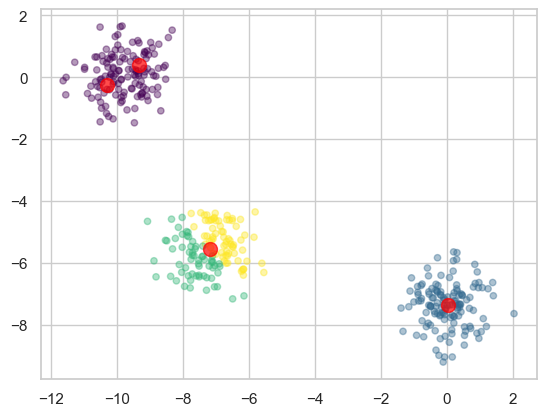

In [40]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
yPredGmm = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=yPredGmm, s=21, cmap='viridis', alpha=0.4)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.7);

But because GMM contains a probabilistic model under the hood, it is also possible to find probabilistic cluster assignments—in Scikit-Learn this is done using the ``predict_proba`` method.
This returns a matrix of size ``[n_samples, n_clusters]`` which measures the probability that any point belongs to the given cluster:

In [41]:
probs = gmm.predict_proba(X)
print(probs)

[[4.03247113e-16 6.80126569e-33 3.06521648e-02 9.69347835e-01]
 [2.41799790e-22 1.45825708e-28 8.32324048e-02 9.16767595e-01]
 [1.00000000e+00 1.02704038e-74 6.26117788e-22 6.41897413e-19]
 ...
 [1.15826318e-16 1.33229231e-38 8.58437326e-01 1.41562674e-01]
 [8.35799290e-14 1.78797238e-36 9.41674193e-02 9.05832581e-01]
 [2.39916944e-24 7.37713538e-28 1.83070114e-01 8.16929886e-01]]


We can visualize this uncertainty by, for example, making the size of each point proportional to the certainty of its prediction; looking at the following figure, we can see that it is precisely the points at the boundaries between clusters that reflect this uncertainty of cluster assignment:

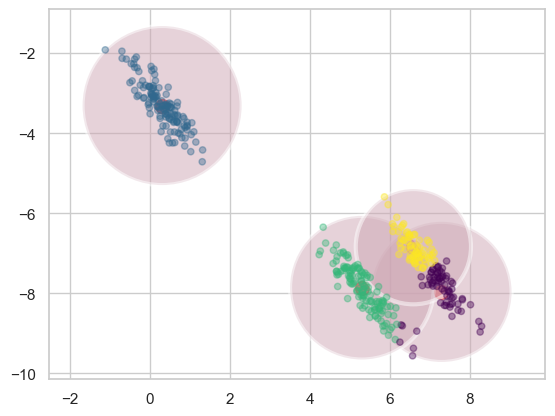

In [42]:
kMeans = KMeans(n_clusters=4, random_state=33)
plotKMeans(kMeans, XStretched)

In [43]:
from matplotlib.patches import Ellipse

def drawEllipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    #for nsig in range(1, 4):
        #ax.add_patch(Ellipse(position, nsig*width, nsig*height, angle, **kwargs))
        
def plotGmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=21, cmap='viridis', zorder=2, alpha=0.4)
        #ax.scatter(X[:, 0], X[:, 1], c=labels, s=21, cmap='viridis', alpha=0.4)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=21, zorder=2, alpha=0.4)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        drawEllipse(pos, covar, ax, alpha=w*w_factor)

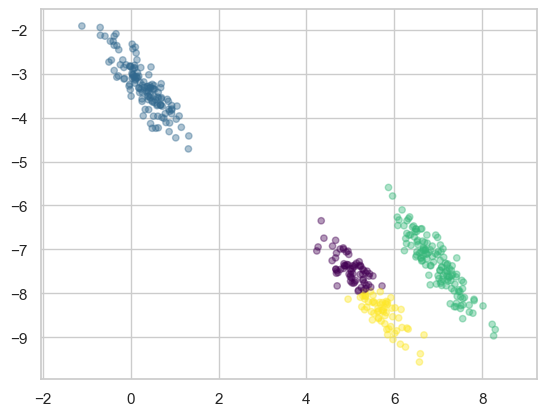

In [44]:
gmm = GaussianMixture(n_components=4, random_state=42)
plotGmm(gmm, XStretched)

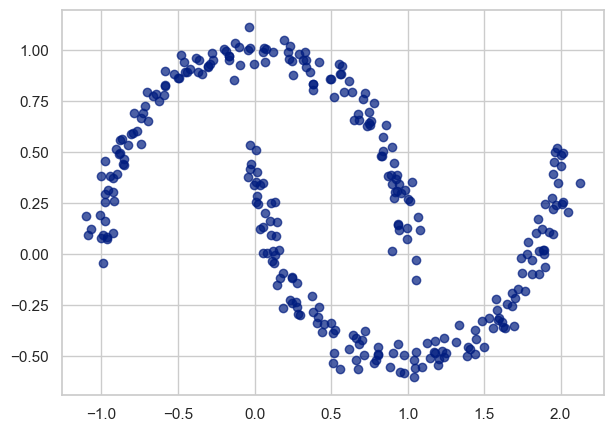

In [45]:
from sklearn.datasets import make_moons
XMoon, yMoon = make_moons(300, noise=.05, random_state=0)
plt.figure(figsize=(7, 5))
plt.scatter(XMoon[:, 0], XMoon[:, 1], alpha=0.7);

If we try to fit this with a two-component GMM viewed as a clustering model, the results are not particularly useful:

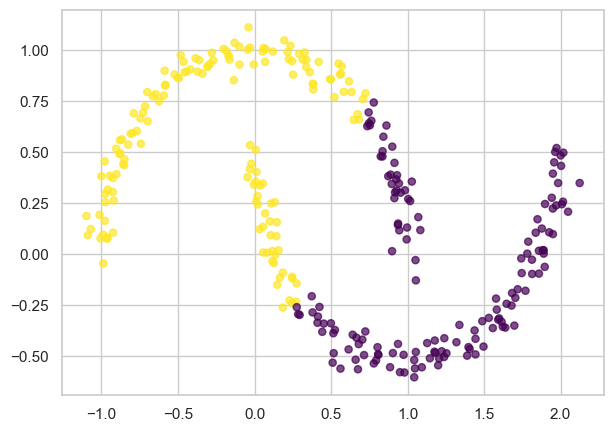

In [46]:
yMoonPredKmeans = KMeans(2, random_state=0).fit_predict(XMoon)
plt.figure(figsize=(7, 5))
plt.scatter(XMoon[:, 0], XMoon[:, 1], c=yMoonPredKmeans, s=27, cmap='viridis', alpha=0.7);

One version of this kernelized *k*-means is implemented in Scikit-Learn within the ``SpectralClustering`` estimator.
It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a *k*-means algorithm:

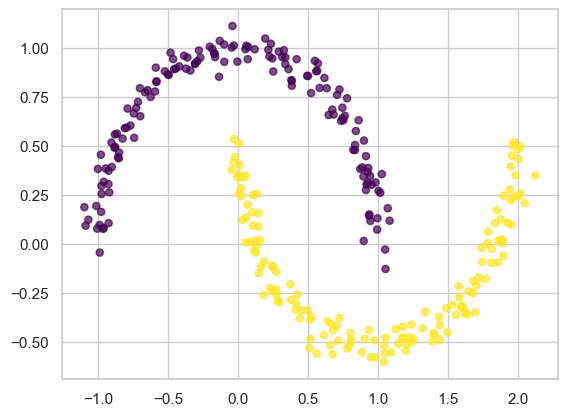

In [47]:
from sklearn.cluster import SpectralClustering
scModel = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                    assign_labels='kmeans')
yMoonPredSC = scModel.fit_predict(XMoon)
plt.scatter(XMoon[:, 0], XMoon[:, 1], c=yMoonPredSC,
            s=27, cmap='viridis', alpha=0.7);

We see that with this kernel transform approach, the kernelized *k*-means is able to find the more complicated nonlinear boundaries between clusters.

In [48]:
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

<Axes: xlabel='flipper_length_mm', ylabel='bill_length_mm'>

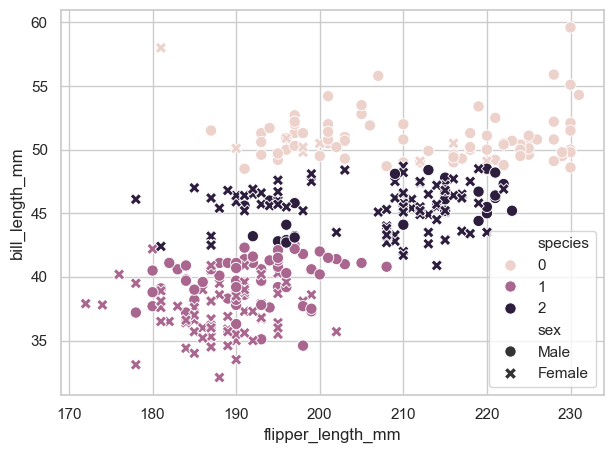

In [49]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=penguins, x='flipper_length_mm', 
                y='bill_length_mm', hue="species", style="sex", s=66)

In [50]:
penDf.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [51]:
XGmm2D = penDf.loc[:,['flipper_length_mm', 'bill_length_mm']] 
yGmm = penDf["species"]

In [52]:
gmm2D = GaussianMixture(n_components = 3) 
gmm2D.fit(XGmm2D)

GaussianMixture(n_components=3)

In [53]:
yPredGmm = gmm2D.predict(XGmm2D)

In [54]:
metrics.rand_score(yGmm, yPredGmm)

0.8912768189876623

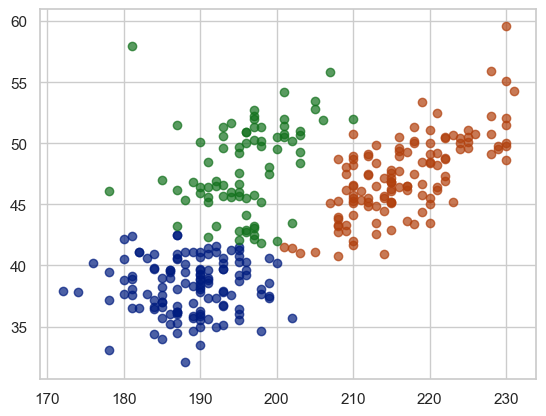

In [55]:
df = pd.DataFrame(XGmm2D)
df['cluster'] = yPredGmm
df.columns = ['flipperLength','billLength', 'cluster']
for k in range (0,3):
    data = df[df['cluster'] == k]
    plt.scatter(data['flipperLength'], data['billLength'], alpha=0.7)
plt.show()

In [56]:
XGmm2D = penDf.loc[:,['flipper_length_mm', 'bill_length_mm']] 
yGmm = penDf["species"]
gmm2DS = GaussianMixture(n_components = 3, covariance_type='spherical') 
gmm2DS.fit(XGmm2D)
yPredGmmS = gmm2DS.predict(XGmm2D)
metrics.rand_score(yGmm, yPredGmmS)

0.8317956510727595

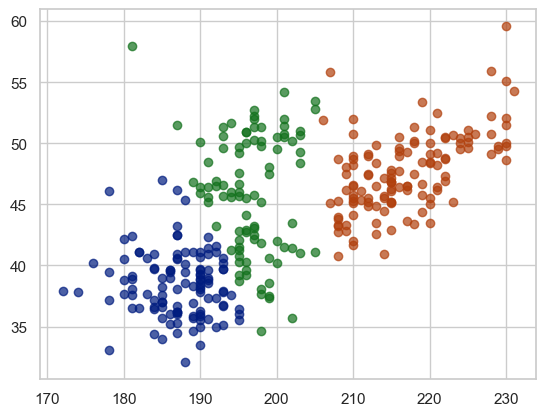

In [57]:
df = pd.DataFrame(XGmm2D)
df['cluster'] = yPredGmmS
df.columns = ['flipperLength','billLength', 'cluster']
for k in range (0,3):
    data = df[df['cluster'] == k]
    plt.scatter(data['flipperLength'], data['billLength'], alpha=0.7)
plt.show()

In [58]:
XPen4D.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [59]:
gmm4D = GaussianMixture(n_components = 3) 
gmm4D.fit(XPen4D)
yPredGmm4D = gmm4D.predict(XPen4D)
metrics.rand_score(yGmm, yPredGmm4D)

0.98109555338471

In [60]:
XPen4DSs.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361
3,-1.335566,1.085877,-0.569284,-0.941606
4,-0.859415,1.747026,-0.783651,-0.692852


In [61]:
gmm4DSs = GaussianMixture(n_components = 3) 
gmm4DSs.fit(XPen4DSs)
yPredGmm4DSs = gmm4DSs.predict(XPen4DSs)
metrics.rand_score(yGmm, yPredGmm4DSs)

0.98109555338471

-----
<font color=maroon size='4'>**Choosing the number of components**</font> 
----
----

- The fact that GMM is a generative model gives us a natural means of determining the optimal number of components for a given dataset.

    - A generative model is inherently a probability distribution for the dataset, and so we can simply evaluate the *likelihood* of the data under the model, using cross-validation to avoid over-fitting.

    - Another means of correcting for over-fitting is to adjust the model likelihoods using some analytic criterion such as the [**Akaike information criterion (AIC)**](https://en.wikipedia.org/wiki/Akaike_information_criterion) or the [**Bayesian information criterion (BIC)**](https://en.wikipedia.org/wiki/Bayesian_information_criterion).

- `scikit-Learn`'s ``GMM`` estimator actually includes built-in methods that compute both of these, and so it is very easy to operate on this approach.


*Note:* that using a Variational Bayesian Gaussian mixture avoids the specification of the number of components for a Gaussian mixture model.

Let's look at the AIC and BIC as a function as the number of GMM components for our moon dataset:

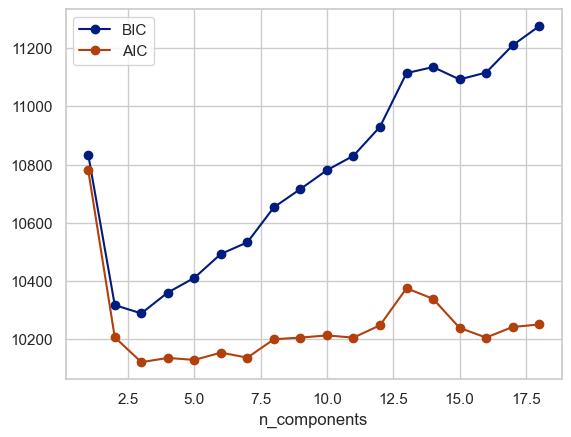

In [62]:
n_components = np.arange(1, 19)
modelsGMM = [GaussianMixture(n, covariance_type='full', random_state=21).fit(XPen4D)
          for n in n_components]

plt.plot(n_components, [m.bic(XPen4D) for m in modelsGMM], '-o', label='BIC')
plt.plot(n_components, [m.aic(XPen4D) for m in modelsGMM], '-o', label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

The optimal number of clusters is the value that minimizes the AIC or BIC, depending on which approximation we wish to use. 

As is typical with this sort of problem, the BIC recommends a simpler model.

Notice the important point: this choice of number of components measures how well GMM works *as a density estimator*, not how well it works *as a clustering algorithm*.

I is encouraged that you to think of GMM primarily as a density estimator, and use it for clustering only when warranted within simple datasets.

----
<font color=maroon size='4'>**GMM limitations**</font> 
----

- The main difficulty in learning GMMs from unlabeled data is that it is one usually doesn’t know which points came from which latent component (if one has access to this information it gets very easy to fit a separate Gaussian distribution to each set of points). 
    - EM is a well-founded statistical algorithm to get around this problem by an iterative process. 


- The result of GMM is that each cluster is associated not with a hard-edged sphere, but with a smooth Gaussian model.

- Just as in the *K*-means EM approach, this algorithm can sometimes miss the globally optimal solution, and thus in practice multiple random initializations are used.

    - This algorithm only guarantee that we land to a local optimal point, but it do not guarantee that this local optima is also the global one. And so, if the algorithm starts from different initialization points, in general it lands into different configurations.


----
<font color='maroon' size='5'>**Hierarchical Clustering - Agglomerative**</font> 
----
-----

The following algorithm is the simplest and easiest to understand among all the the clustering algorithms without a fixed number of clusters.


The algorithm is fairly simple:
1. We start by assigning each observation to its own cluster
2. Then sort the pairwise distances between the centers of clusters in descending order
3. Take the nearest two neigbor clusters and merge them together, and recompute the centers
4. Repeat steps 2 and 3 until all the data is merged into one cluster

The process of searching for the nearest cluster can be conducted with different methods of bounding the observations:
1. Single linkage 
$d(C_i, C_j) = min_{x_i \in C_i, x_j \in C_j} ||x_i - x_j||$
2. Complete linkage 
$d(C_i, C_j) = max_{x_i \in C_i, x_j \in C_j} ||x_i - x_j||$
3. Average linkage 
$d(C_i, C_j) = \frac{1}{n_i n_j} \sum_{x_i \in C_i} \sum_{x_j \in C_j} ||x_i - x_j||$
4. Centroid linkage 
$d(C_i, C_j) = ||\mu_i - \mu_j||$

The 3rd one is the most effective in computation time since it does not require recomputing the distances every time the clusters are merged.

The results can be visualized as a beautiful cluster tree (dendogram) to help recognize the moment the algorithm should be stopped to get optimal results. There are plenty of Python tools to build these dendograms for agglomerative clustering.


----
<font color=maroon size='4'>**Agglomerative clustering with scikit-learn**</font> 
----

----

Agglomerative clustering of unlabeled data can be performed with the module `sklearn.cluster`.
- In `sklearn.cluster`module `AgglomerativeClustering` class object implements the Agglomerative clustering
    - `AgglomerativeClustering.fit(.)`: fit the hierarchical clustering from features, or distance matrix.
    - `AgglomerativeClustering.predict(.)`: fit and return the result of each sample's clustering assignment.
        - `metric`: Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. If set to None then “euclidean” is used. 
        - `linkage`: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. (‘ward’, ‘complete’, ‘average’, ‘single’)

In [63]:
XPen2D

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6
...,...,...
338,47.2,13.7
340,46.8,14.3
341,50.4,15.7
342,45.2,14.8


In [64]:
from sklearn.cluster import AgglomerativeClustering 
aggClt2D = AgglomerativeClustering(n_clusters = 3, linkage = 'average')
aggClt2D.fit(XPen2D)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [65]:
from scipy.spatial import distance_matrix
distMatrix2D = distance_matrix(XPen2D, XPen2D) 
print(distMatrix2D)

[[ 0.          1.36014705  1.3892444  ... 11.69144987  7.24016574
  11.10855526]
 [ 1.36014705  0.          1.         ... 11.0317723   6.26498204
  10.48093507]
 [ 1.3892444   1.          0.         ... 10.35857133  5.85234996
   9.78621479]
 ...
 [11.69144987 11.0317723  10.35857133 ...  0.          5.27730992
   0.64031242]
 [ 7.24016574  6.26498204  5.85234996 ...  5.27730992  0.
   4.87647414]
 [11.10855526 10.48093507  9.78621479 ...  0.64031242  4.87647414
   0.        ]]


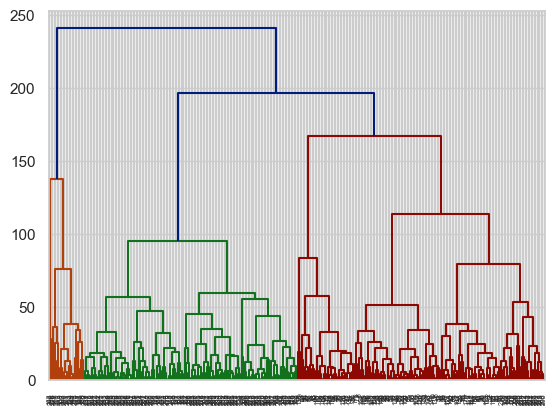

In [66]:
from scipy.cluster import hierarchy
Z2D = hierarchy.linkage(distMatrix2D, 'complete')
dendro2D = hierarchy.dendrogram(Z2D)

In [67]:
yPredAgg2D = aggClt2D.fit_predict(XPen2D)
metrics.rand_score(yPen, yPredAgg2D)

0.8184449509750714

In [68]:
aggClt4D = AgglomerativeClustering(n_clusters = 3, linkage = 'average')
aggClt4D.fit(XPen4D)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [69]:
distMatrix4D = distance_matrix(XPen4D, XPen4D) 
print(distMatrix4D)

[[   0.           50.26778292  500.19789084 ... 2000.45437089
  1450.34941307 1650.34766034]
 [  50.26778292    0.          550.0745404  ... 1950.36347894
  1400.25542313 1600.26211915]
 [ 500.19789084  550.0745404     0.         ... 2500.16725441
  1950.08288285 2150.09761871]
 ...
 [2000.45437089 1950.36347894 2500.16725441 ...    0.
   550.11621499  350.11628068]
 [1450.34941307 1400.25542313 1950.08288285 ...  550.11621499
     0.          200.06194041]
 [1650.34766034 1600.26211915 2150.09761871 ...  350.11628068
   200.06194041    0.        ]]


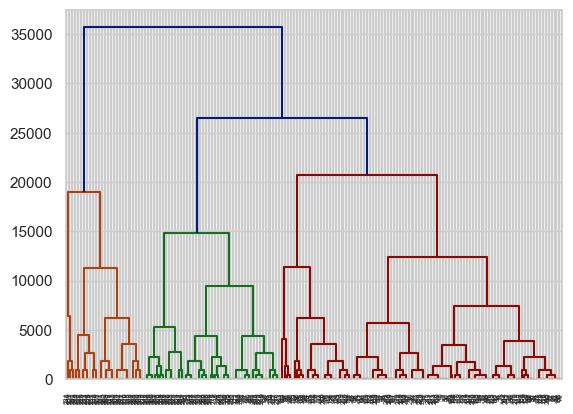

In [70]:
Z4D = hierarchy.linkage(distMatrix4D, 'complete')
dendro4D = hierarchy.dendrogram(Z4D)

In [71]:
yPredAgg4D = aggClt4D.fit_predict(XPen4D)
metrics.rand_score(yPen, yPredAgg4D)

0.6820796700314773

----
<font color=maroon size='5'>**Clustering performance evaluation**</font> 
----
----

- Evaluating the performance of a clustering algorithm is not as trivial as counting the number of errors or the precision and recall of a supervised classification algorithm. 

- As opposed to classfication, it is difficult to assess the quality of results from clustering. 

- A metric cannot depend on the labels but only on the goodness of split. Secondly, we do not usually have true labels of the observations when we use clustering.

- There are ***internal*** and ***external*** goodness metrics. External metrics use the information about the known true split while internal metrics do not use any external information and assess the goodness of clusters based only on the initial data. The optimal number of clusters is usually defined with respect to some internal metrics. 

- In particular any evaluation metric should not take the absolute values of the cluster labels into account but rather if this clustering define separations of the data similar to some ground truth set of classes or satisfying some assumption such that members belong to the same class are more similar than members of different classes according to some similarity metric.

    - Rand index
    - Mutual Information based scores 
    - Homogeneity, completeness and V-measure
    - Fowlkes-Mallows scores
    - Silhouette Coefficient 
    - Calinski-Harabasz Index 
    - Davies-Bouldin Index  
    - Contingency Matrix  


Ref: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation


<font color=maroon size='3'>**Adjusted Rand Index (ARI)**</font> 
----
----


Given the knowledge of the ground truth class assignments `labels_true` and our clustering algorithm assignments of the same samples `abels_pred` the (adjusted or unadjusted) Rand index is a function that measures the similarity of the two assignments, ignoring permutations:

---


If C is a ground truth class assignment and K the clustering, let us define  and  as:

- $a$, the number of pairs of elements that are in the same set in C and in the same set in K

- $b$, the number of pairs of elements that are in different sets in C and in different sets in K

The unadjusted Rand index is then given by:

$$\text{RI} = \frac{a + b}{C_2^{n_{samples}}}$$


where $C_2^{n_{samples}}$ is the total number of possible pairs in the dataset. It does not matter if the calculation is performed on ordered pairs or unordered pairs as long as the calculation is performed consistently.

However, the Rand index does not guarantee that random label assignments will get a value close to zero (esp. if the number of clusters is in the same order of magnitude as the number of samples).

To counter this effect we can discount the expected RI $E[RI]$ of random labelings by defining the adjusted Rand index as follows:

$$ \text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}$$

In [72]:
metrics.rand_score(yGmm, yPredGmm4D)

0.98109555338471

In [73]:
metrics.adjusted_rand_score(yGmm, yPredGmm4D)

0.9589958965465829


<font color=maroon size='3'>**Adjusted Mutual Information (AMI) based scores**</font> 
----
----

This metric is similar to $\text{ARI}$. It is also symmetric and does not depend on the labels' values and permutation. It is defined by the [entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory) function and interprets a sample split as a discrete distribution (likelihood of assigning to a cluster is equal to the percent of objects in it). The $MI$ index is defined as the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) for two distributions, corresponding to the sample split into clusters. Intuitively, the mutual information measures the share of information common for both clustering splits i.e. how information about one of them decreases the uncertainty of the other one.

Similarly to the $\text{ARI}$, the $\text{AMI}$ is defined. This allows us to get rid of the $MI$ index's increase with the number of clusters. The $\text{AMI}$ lies in the $[0, 1]$ range. Values close to zero mean the splits are independent, and those close to 1 mean they are similar (with complete match at $\text{AMI} = 1$).


In [74]:
metrics.adjusted_mutual_info_score(yGmm, yPredGmm4D)

0.9332764043147155


<font color=maroon size='3'>**Homogeneity, completeness and V-measure**</font> 
----
----


Given the knowledge of the ground truth class assignments of the samples, it is possible to define some intuitive metric using conditional entropy analysis.

In particular Rosenberg and Hirschberg (2007) define the following two desirable objectives for any cluster assignment:

- **homogeneity:** each cluster contains only members of a single class.

- **completeness:** all members of a given class are assigned to the same cluster.

We can turn those concept as scores homogeneity_score and completeness_score. Both are bounded below by 0.0 and above by 1.0 (higher is better):

Their harmonic mean called V-measure is computed by v_measure_score:

This function’s formula is as follows:

$$v = \frac{(1 + \beta) \times \text{homogeneity} \times \text{completeness}}{(\beta \times \text{homogeneity} + \text{completeness})}$$

beta defaults to a value of 1.0, but for using a value less than 1 for beta:

----



Homogeneity and completeness scores are formally given by:

$$h = 1 - \frac{H(C|K)}{H(C)}$$

$$c = 1 - \frac{H(K|C)}{H(K)}$$

where $H(C|K)$ is the conditional entropy of the classes given the cluster assignments and is given by:

$$H(C|K) = - \sum_{c=1}^{|C|} \sum_{k=1}^{|K|} \frac{n_{c,k}}{n}\cdot \log\left(\frac{n_{c,k}}{n_k}\right)$$


and $H(C)$ is the entropy of the classes and is given by:

$$H(C) = - \sum_{c=1}^{|C|} \frac{n_c}{n} \cdot \log\left(\frac{n_c}{n}\right)$$ 
 
 
with $n$ the total number of samples, $n_c$ and $n_k$ the number of samples respectively belonging to class $c$ and cluster $k$, and finally $n_{c,k}$ the number of samples from class  assigned to cluster .

The conditional entropy of clusters given class $H(K|C)$ and the entropy of clusters $H(K)$ are defined in a symmetric manner.

Rosenberg and Hirschberg further define V-measure as the harmonic mean of homogeneity and completeness:

$$v = 2 \cdot \frac{h \cdot c}{h + c}$$

Both lie in the $[0, 1]$ range, and values closer to 1 indicate more accurate clustering results. These metrics' values are not scaled as the $\text{ARI}$ or $\text{AMI}$ metrics are and thus depend on the number of clusters. A random clustering result will not have metrics' values closer to zero when the number of clusters is big enough and the number of objects is small. In such a case, it would be more reasonable to use $\text{ARI}$. However, with a large number of observations (more than 100) and the number of clusters less than 10, this issue is less critical and can be ignored.


In [75]:
metrics.homogeneity_score(yGmm, yPredGmm4D)

0.9326301161248665

In [76]:
metrics.v_measure_score(yGmm, yPredGmm4D)

0.9336611444985973

In [77]:
metrics.homogeneity_completeness_v_measure(yGmm, yPredGmm4D)

(0.9326301161248665, 0.9346944550117621, 0.9336611444985973)

Note v_measure_score is symmetric: it can be used to evaluate the agreement of two independent assignments on the same dataset.
This is not the case for completeness_score and homogeneity_score: both are bound by the relationship:


`homogeneity_score(a, b) == completeness_score(b, a)`


<font color=maroon size='3'>**Fowlkes-Mallows scores**</font> 
----
----


The Fowlkes-Mallows index (sklearn.metrics.fowlkes_mallows_score) can be used when the ground truth class assignments of the samples is known. The Fowlkes-Mallows score FMI is defined as the geometric mean of the pairwise precision and recall:

$$ \text{FMI} = \frac{\text{TP}}{\sqrt{(\text{TP} + \text{FP}) (\text{TP} + \text{FN})}} $$

Where TP is the number of True Positive (i.e. the number of pair of points that belong to the same clusters in both the true labels and the predicted labels), FP is the number of False Positive (i.e. the number of pair of points that belong to the same clusters in the true labels and not in the predicted labels) and FN is the number of False Negative (i.e the number of pair of points that belongs in the same clusters in the predicted labels and not in the true labels).

The score ranges from 0 to 1. A high value indicates a good similarity between two clusters.

In [78]:
metrics.fowlkes_mallows_score(yGmm, yPredGmm4D)

0.9737766019652825


<font color=maroon size='3'>**Silhouette Coefficient**</font> 
----
----


If the ground truth labels are not known, evaluation must be performed using the model itself. The Silhouette Coefficient (sklearn.metrics.silhouette_score) is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

$a$: The mean distance between a sample and all other points in the same class.

$b$: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient s for a single sample is then given as:

$$ s = \frac{b - a}{max(a, b)} $$
The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
yPen = le.fit_transform(yPen.values)

In [80]:
from sklearn.metrics import pairwise_distances

In [81]:
metrics.silhouette_score(yPen.reshape(-1,1), yPredGmm4D,  metric='euclidean')

0.9551698518129816


<font color=maroon size='3'>**Calinski-Harabasz Index**</font> 
----
----


If the ground truth labels are not known, the Calinski-Harabasz index (sklearn.metrics.calinski_harabasz_score) - also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared):

----


For a set of data $E$ of size $n_E$ which has been clustered into $k$ clusters, the Calinski-Harabasz score $s$ is defined as the ratio of the between-clusters dispersion mean and the within-cluster dispersion:

$$s = \frac{\mathrm{tr}(B_k)}{\mathrm{tr}(W_k)} \times \frac{n_E - k}{k - 1}$$

where $\mathrm{tr}(B_k)$ is trace of the between group dispersion matrix and $\mathrm{tr}(W_k)$ is the trace of the within-cluster dispersion matrix defined by:


$$W_k = \sum_{q=1}^k \sum_{x \in C_q} (x - c_q) (x - c_q)^T$$
$$B_k = \sum_{q=1}^k n_q (c_q - c_E) (c_q - c_E)^T$$

with $C_q$ the set of points in cluster $q$, $c_q$ the center of cluster $q$, $c_E$ the center of $E$, and $n_q$ the number of points in cluster $q$.

In [82]:
metrics.calinski_harabasz_score(yPen.reshape(-1,1), yPredGmm4D)

8722.707713956934


<font color=maroon size='3'>**Davies-Bouldin Index**</font> 
----
----


If the ground truth labels are not known, the Davies-Bouldin index (sklearn.metrics.davies_bouldin_score) can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition.

In normal usage, the Davies-Bouldin index is applied to the results of a cluster analysis as follows:


----


The index is defined as the average similarity between each cluster $C_i$ for $i=1,...,k$ and its most similar one $C_j$. In the context of this index, similarity is defined as a measure $R_{ij}$ that trades off:


- $s_{i}$, the average distance between each point of cluster  and the centroid of that cluster – also know as cluster diameter.

- $d_{ij}$, the distance between cluster centroids $i$ and $j$.


A simple choice to construct $R_{ij}$ so that it is nonnegative and symmetric is:

$$R_{ij} = \frac{s_i + s_j}{d_{ij}}$$
 
Then the Davies-Bouldin index is defined as:

 
 
 $$DB = \frac{1}{k} \sum_{i=1}^k \max_{i \neq j} R_{ij}$$

In [83]:
from sklearn.metrics import davies_bouldin_score


In [84]:
davies_bouldin_score(yPen.reshape(-1,1), yPredGmm4D)

0.08746922304394429


<font color=maroon size='3'>**Contingency Matrix**</font> 
----
----


Contingency matrix (sklearn.metrics.cluster.contingency_matrix) reports the intersection cardinality for every true/predicted cluster pair. The contingency matrix provides sufficient statistics for all clustering metrics where the samples are independent and identically distributed and one doesn’t need to account for some instances not being clustered.

Here is an example:


In [85]:
from sklearn.metrics.cluster import contingency_matrix


In [86]:
contingency_matrix(yPen.reshape(-1,1), yPredGmm4D)

array([[144,   2,   0],
       [  3,  65,   0],
       [  0,   0, 119]], dtype=int64)

The first row of output array indicates that there are three samples whose true cluster is “0”. Of them, two are in predicted cluster 0, one is in 1, and none is in 2. And the second row indicates that there are three samples whose true cluster is “1”. Of them, none is in predicted cluster 0, one is in 1 and two are in 2.

A confusion matrix for classification is a square contingency matrix where the order of rows and columns correspond to a list of classes.

The first row of output array indicates that there are three samples whose true cluster is “a”. Of them, two are in predicted cluster 0, one is in 1, and none is in 2. And the second row indicates that there are three samples whose true cluster is “b”. Of them, none is in predicted cluster 0, one is in 1 and two are in 2.

A confusion matrix for classification is a square contingency matrix where the order of rows and columns correspond to a list of classes.


<font color=maroon size='3'>**Pair Confusion Matrix**</font> 
----
----


The pair confusion matrix `(sklearn.metrics.cluster.pair_confusion_matrix)` is a 2x2 similarity matrix

$$ C = \left[\begin{matrix}
C_{00} & C_{01} \\
C_{10} & C_{11}
\end{matrix}\right]$$

between two clusterings computed by considering all pairs of samples and counting pairs that are assigned into the same or into different clusters under the true and predicted clusterings.

It has the following entries:

- $C_{00}$: number of pairs with both clusterings having the samples not clustered together

- $C_{10}$: number of pairs with the true label clustering having the samples clustered together but the other clustering not having the samples clustered together

- $C_{01}$: number of pairs with the true label clustering not having the samples clustered together but the other clustering having the samples clustered together

- $C_{11}$: number of pairs with both clusterings having the samples clustered together

Considering a pair of samples that is clustered together a positive pair, then as in binary classification the count of true negatives is , false negatives is , true positives is  and false positives is .

Perfectly matching labelings have all non-zero entries on the diagonal regardless of actual label values:

In [87]:
from sklearn.metrics.cluster import pair_confusion_matrix
pair_confusion_matrix(yPen, yPredGmm4D)


array([[69664,  1124],
       [  966, 38802]], dtype=int64)

Labelings that assign all classes members to the same clusters are complete but may not always be pure, hence penalized, and have some off-diagonal non-zero entries:


----

<font color='maroon' size='5'>Principal Component Analysis (PCA) </font>
--
-----

- Large datasets with hundreds or thousands of features often lead to redundancy especially when features are correlated with each other. Training a model on a high-dimensional dataset having too many features can sometimes lead to **overfitting** (model captures both real and random effects). Also, an overly-complex model having too many features can be hard to interpret. One way to solve the problem of redundancy is via **feature selection** and **dimensionality reduction** techniques such as PCA (principal component analysis) or using the covariance matrix plot.

- There are two ways you could use PCA for feature engineering.

    - 1. The first way is to use it as a descriptive technique. Since the components tell you about the variation, you could compute the Mutual Information (MI) scores for the components and see what kind of variation is most predictive of your target.  You could even try clustering on one or more of the high-scoring components.

    - 2. The second way is to use the components themselves as features. Because the components expose the variational structure of the data directly, they can often be more informative than the original features. Here are some use-cases:

- Dimensionality reduction: When your features are highly redundant (multicollinear, specifically), PCA will partition out the redundancy into one or more near-zero variance components, which you can then drop since they will contain little or no information.

- **Anomaly detection:** Unusual variation, not apparent from the original features, will often show up in the low-variance components. These components could be highly informative in an anomaly or outlier detection task.

- **Noise reduction:** A collection of sensor readings will often share some common background noise. PCA can sometimes collect the (informative) signal into a smaller number of features while leaving the noise alone, thus boosting the signal-to-noise ratio.

- **Decorrelation:** Some ML algorithms struggle with highly-correlated features. PCA transforms correlated features into uncorrelated components, which could be easier for your algorithm to work with.

PCA basically gives you direct access to the correlational structure of your data. You'll no doubt come up with applications of your own!

----



- There are a few things to keep in mind when applying PCA:
    - PCA only works with numeric features, like continuous quantities or counts.
    - PCA is sensitive to scale. It's good practice to standardize your data before applying PCA, unless you know you have good reason not to.
    - Consider removing or constraining outliers, since they can have an undue influence on the results.

<font color='maroon' size='3'>Basic Idea</font>
---


Suppose we have $N$ i.i.d. unlabeled vector-valued samples $\mathcal{D} = (\mathbf{x}^{(1)}, \ldots, \mathbf{x}^{(N)}) \stackrel{i.i.d.}{\sim} \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$ where $\mathbf{x}^{(i)} \in {\mathbb{R}}^{n}$, $\boldsymbol{\mu} \in {\mathbb{R}}^{n}$ is the mean vector and $\boldsymbol{\Sigma} \in {\mathbb{R}}^{n \times n}$ is a real symmetric positive semi-definite matrix.

-----------


Basic idea of PCA is to find a <b>linear</b> and <b>orthogonal</b> projection of a high-dimensional $\mathbf{x} \in {\mathbb{R}}^{n}$ to a low-dimensional <b>latent vector</b> $\mathbf{z} \in {\mathbb{R}}^{k}$, where $k \ll n$, such that $\mathbf{z}$ accurately represents the original data. We can acquire this latent or hidden vector via a linear projection onto the latent space: $\mathbf{z} = \mathbf{W}^\intercal\mathbf{x}$, where $\mathbf{W}$ is an orthogonal projection matrix.

We could then define how well $\mathbf{z} = \mathbf{W}^\intercal(\mathbf{x} - \boldsymbol{\mu}_{x})$ <i>represents</i> $\mathbf{x}$ based on the <b>reconstruction error</b>, usually defined by MSE, against a reconstruction or "decoding", $\mathbf{\hat{x}}= \mathbf{W}(\mathbf{z} + \boldsymbol{\mu}_{x}$). The mean $\boldsymbol{\mu}_{x}$ here illustrates how non-zero mean inputs would be centered.

Minimizing the reconstruction error can be shown to be equivalent to maximizing the variance of the projected data when the inputs are mean-centered. By performing PCA to minimize this reconstruction error, we thus also find the directions of maximal variance in the data as the eigenvectors of its covariance matrix $\boldsymbol{\Sigma}$. Given this setup, let us first <i>"encode"</i> example $\mathbf{x}^{(i)}$ into a latent space of dimensionality $k$ with minimal reconstruction error as follows:

\begin{equation*}
\mathbf{z}^{(i)} = \mathbf{U}_k^\intercal \mathbf{x}^{(i)},
\end{equation*}

where the optimal orthogonal projection matrix is $\mathbf{W^*} = \mathbf{U}_k$, with the columns of $\mathbf{U}_k$ as the $k$ eigenvectors of $\mathbf{\Sigma}$ with largest eigenvalues:

\begin{equation*}
\mathbf{\Sigma} = \mathbf{U}_k \mathbf{\Lambda} \mathbf{U}_k^\intercal,
\end{equation*}

with $\mathbf{\Lambda} = \text{diag}(\lambda_1, \ldots, \lambda_k)$, $\lambda_1 > \cdots > \lambda_k$ sorted in decreasing order of value.

Stacked into matrix form for all $N$ examples:

\begin{equation*}
\mathbf{Z} = \mathbf{X}\mathbf{U}_k.
\end{equation*}

From these $k$-dimensional principal component projections, we can reconstruct or <i>"decode"</i> the original data approximately as follows:

\begin{equation*}
\mathbf{\hat{x}}^{(i)} = \mathbf{U}_k \mathbf{z}^{(i)},
\end{equation*}

which again in matrix form is:

\begin{equation*}
\mathbf{\hat{X}} = \mathbf{Z}_k \mathbf{U}_k^\intercal.
\end{equation*}

There you have your minimized error reconstructions!

<i>Aside:</i> Instead of computing the eigenvectors of $\boldsymbol{\Sigma} \propto \mathbf{X}^\intercal\mathbf{X}$ (assuming $\mathbf{X}$ is mean-centered) to perform PCA, we can also perform truncated [SVD](https://en.wikipedia.org/wiki/Singular_value_decomposition) of $\mathbf{X}$ as an alternative way of finding the PCs. The latter approach is typically preferable in terms of computational efficiency.


----


Let's explore the following relations against the number of principal components (PCs) $k$:

- The reconstruction loss,

\begin{equation*}
\text{MSE}_k = \frac{1}{N} \sum_{i=1}^N \|\mathbf{x}^{(i)} - \mathbf{U}_k \mathbf{z}^{(i)}\|_2^2.
\end{equation*}

- The fraction of variance "explained" or cumulative explained variance,

\begin{equation*}
\text{F}_k = \frac{\text{Variance Retained by PCs}}{\text{Total Variance in Data}} = \frac{\sum_{j=1}^k \lambda_j}{\text{tr}(\mathbf{\Sigma})} \in [0, 1].
\end{equation*}

Now evaluate the reconstruction loss and fraction of variance explained by plotting against $k \in \{1, \ldots, n-1\}$ components, i.e., plots for $\text{MSE}_k$ vs $k$ and $\text{F}_k$ vs $k$. Note that reconstruction loss will actually be based on Root MSE (RMSE), so as to display values in the same order as our inputs.

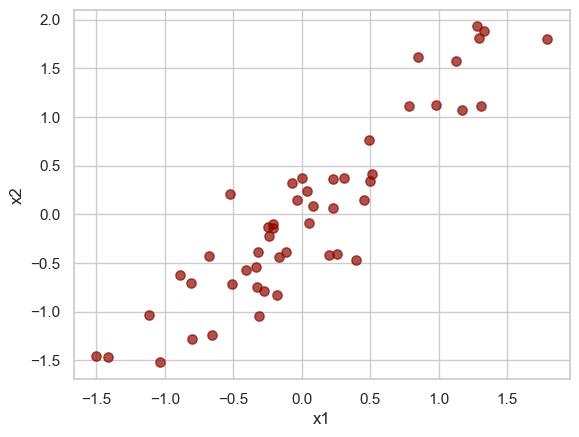

In [88]:
rng = np.random.RandomState(7)
XX = np.dot(rng.rand(2, 2), rng.randn(2, 50)).T
fig = plt.figure()
plt.scatter(XX[:, 0], XX[:, 1], s=45, c='r', alpha=0.7)
plt.xlabel("x1")
plt.ylabel("x2");
fig.savefig('pca.png')

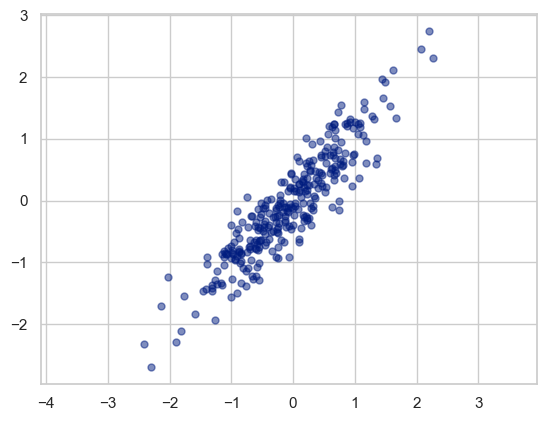

In [89]:
rng = np.random.RandomState(7)
XX = np.dot(rng.rand(2, 2), rng.randn(2, 300)).T
plt.scatter(XX[:, 0], XX[:, 1], s=25, alpha=0.5)
plt.axis('equal');

By eye, it is clear that there is a nearly linear relationship between the x and y variables.
This is reminiscent of the linear regression data we explored in [In Depth: Linear Regression](05.06-Linear-Regression.ipynb), but the problem setting here is slightly different: rather than attempting to *predict* the y values from the x values, the unsupervised learning problem attempts to learn about the *relationship* between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset.
Using Scikit-Learn's ``PCA`` estimator, we can compute this as follows:

In [90]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca2.fit(XX)

PCA(n_components=2)

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [91]:
print(pca2.components_)

[[ 0.6717869   0.74074446]
 [-0.74074446  0.6717869 ]]


In [92]:
print(pca2.explained_variance_)

[1.30948168 0.05692721]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

In [93]:
def drawVector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=3, color='red',
                    shrinkA=0, shrinkB=0, ls='--')
    ax.annotate('', v1, v0, arrowprops=arrowprops)


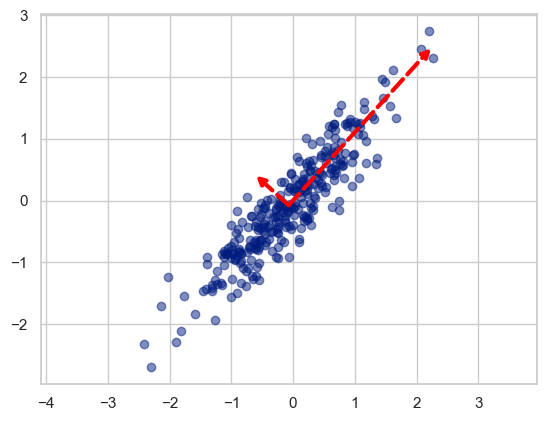

In [94]:
# plot data
plt.scatter(XX[:, 0], XX[:, 1], alpha=0.5)
for length, vector in zip(pca2.explained_variance_, pca2.components_):
    v = vector * 3 * np.sqrt(length)
    drawVector(pca2.mean_, pca2.mean_ + v)
plt.axis('equal');

These vectors represent the *principal axes* of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis.
The projection of each data point onto the principal axes are the "principal components" of the data.

If we plot these principal components beside the original data, we see the plots shown here:

----
<font color=maroon size='4'>**PCA with scikit-learn**</font> 
----

----

PCA can be performed with the module `sklearn.decomposition` in `scikit-learn`.

 - **`model.transform()`:** given an unsupervised model, transform new data into the new basis. This also accepts one argument **X_new**, and returns the new representation of the data based on the unsupervised model.

    - `components_`: Principal axes in feature space, representing the directions of maximum variance in the data. 
    - `explained_variance_`: The amount of variance explained by each of the selected components.
    - `explained_variance_ratio_`: Percentage of variance explained by each of the selected components.
 



Here is an example of using PCA as a dimensionality reduction transform:

In [95]:
pca1 = PCA(n_components=1)
pca1.fit(XX)
XXPca1 = pca1.transform(XX)
print("original shape:   ", XX.shape)
print("transformed shape:", XXPca1.shape)

original shape:    (300, 2)
transformed shape: (300, 1)


The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

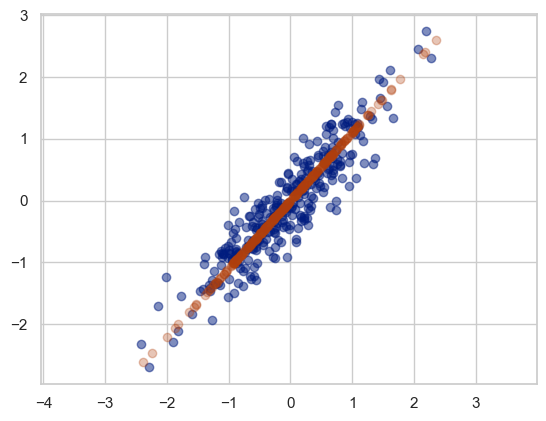

In [96]:
XXNew = pca1.inverse_transform(XXPca1)
plt.scatter(XX[:, 0], XX[:, 1], alpha=0.5)
plt.scatter(XXNew[:, 0], XXNew[:, 1], alpha=0.3)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.
This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.
The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

In [97]:
pcaPen4 = PCA(n_components=4)
pcaPen4.fit(XPen4DSs)
print('Explained_variance_ratio:', pcaPen4.explained_variance_ratio_)
print('Explained_variance_ratio sum:', pcaPen4.explained_variance_ratio_[:2].sum())

Explained_variance_ratio: [0.68633893 0.19452929 0.09216063 0.02697115]
Explained_variance_ratio sum: 0.8808682242049919


- `components_`: ndarray of shape (n_components, n_features) 
    - Principal axes in feature space, representing the directions of maximum variance in the data. Equivalently, the right singular vectors of the centered input data, parallel to its eigenvectors. The components are sorted by decreasing `explained_variance_`.
- `explained_variance_`: ndarray of shape (n_components,)
    - The amount of variance explained by each of the selected components. The variance estimation uses n_samples - 1 degrees of freedom.
    - Equal to n_components **largest eigenvalues of the covariance matrix of X**.
- `explained_variance_ratio_`: ndarray of shape (n_components,)
    - Percentage of variance explained by each of the selected components. 
    - If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.

In [98]:
pcaPen4.explained_variance_

array([2.75362487, 0.7804609 , 0.36975289, 0.10820954])

In [99]:
pcaPen4.components_

array([[ 0.45375317, -0.39904723,  0.576825  ,  0.54967471],
       [ 0.6001949 ,  0.79616951,  0.00578817,  0.07646366],
       [ 0.64249509, -0.42580043, -0.23609516, -0.59173738],
       [ 0.14516955, -0.1599044 , -0.78198369,  0.58468615]])

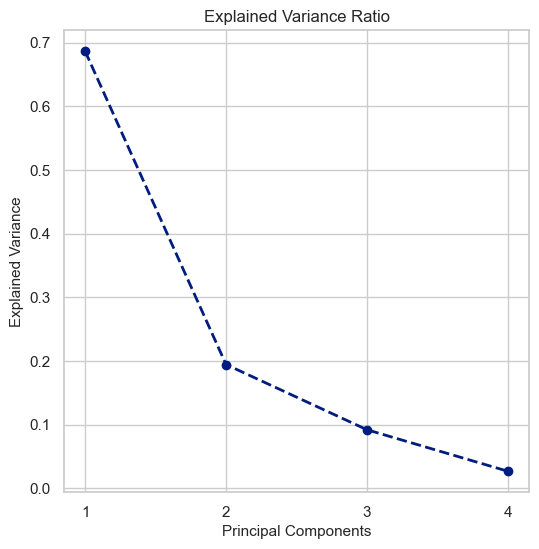

In [100]:
# Visual for each component’s explained variance
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(pcaPen4.explained_variance_ratio_, 'bo--', linewidth=2)
ax.set_xlabel('Principal Components', fontsize = 11)
ax.set_ylabel('Explained Variance', fontsize = 11)
ax.set_title('Explained Variance Ratio', fontsize = 12)
n = len(pcaPen4.explained_variance_ratio_)
plt.xticks(np.arange(n), np.arange(1, n+1));

We see that first two principal components explains 88% of the variance in the data. Now, we can implement PCA with 2 components to visualize Palmer penguins data in 2D.

In [101]:
# Projection onto 2 principal components space: 
pcaPen2 = PCA(n_components=2)
pcaPen2.fit(XPen4DSs)
principalComponents = pca2.fit_transform(XPen4DSs)
# Define new dataframe with principal components
XPenPcaDf = pd.DataFrame(data = principalComponents, columns = [
    'principalComponent1', 'principalComponent2'])
XPenPcaDf['species'] = penDf.species
XPenPcaDf.head()

,principalComponent1,principalComponent2,species
0,-1.853593,0.032069,Adelie
1,-1.316254,-0.443527,Adelie
2,-1.376605,-0.161230,Adelie
3,-1.885288,-0.012351,NaN
4,-1.919981,0.817598,Adelie


<Axes: xlabel='principalComponent1', ylabel='principalComponent2'>

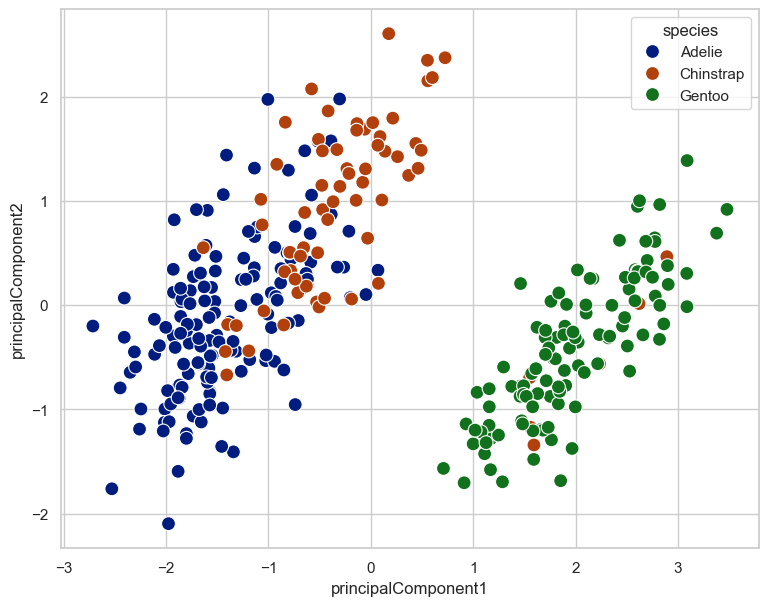

In [102]:
plt.figure(figsize=(9,7))
sns.scatterplot(x="principalComponent1", y="principalComponent2", data=XPenPcaDf, hue="species", s=100)

In [103]:
metrics.rand_score(yPen, y4Pred)

0.7497015087376533

In [104]:
yPenPca=yPen
XPenPca=XPenPcaDf.drop('species', axis=1)

In [105]:
yPen

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [106]:
kMeansPca = KMeans(n_clusters=3)
kMeansPca.fit(XPenPca)
yPredKMeansPca = kMeansPca.labels_
metrics.rand_score(yPenPca, yPredKMeansPca)

0.8740909584283079

In [107]:
metrics.rand_score(yGmm, yPredGmm4D)

0.98109555338471

In [108]:
gmmPca = GaussianMixture(n_components = 3) 
gmmPca.fit(XPenPca)
yPredGmmPca = gmmPca.predict(XPenPca)
metrics.rand_score(yPenPca, yPredGmmPca)

0.8580086110206592

In [109]:
yPredAgg4D = aggClt4D.fit_predict(XPen4D)
metrics.rand_score(yPen, yPredAgg4D)

0.6820796700314773

In [110]:
aggPca = AgglomerativeClustering(n_clusters = 3, linkage = 'average')
aggPca.fit(XPenPca)
distMatrixPca = distance_matrix(XPenPca, XPenPca) 
ZPca = hierarchy.linkage(distMatrixPca, 'complete')
#dendroPca = hierarchy.dendrogram(ZPca)

In [111]:
yPredAggPca = aggPca.fit_predict(XPenPca)
metrics.rand_score(yPenPca, yPredAggPca)

0.8279062194724846


<font color=maroon size='4'>**PCA Limitations**</font> 
----
----



- PCA's main weakness is that it tends to be highly affected by outliers in the data.
    - For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.

- `scikit-learn` contains a couple interesting variants on PCA, including ``RandomizedPCA`` and ``SparsePCA``, both also in the ``sklearn.decomposition`` submodule.
    - ``RandomizedPCA``, which we saw earlier, uses a non-deterministic method to quickly approximate the first few principal components in very high-dimensional data, while ``SparsePCA`` introduces a regularization term.